#  Продвинутая визуализация данных. Задания 3 (vo_HW)

In [1]:
# !pip install mlxtend dtreeviz graphviz

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import itertools
from mlxtend.plotting import plot_decision_regions
import dtreeviz
import graphviz
from sklearn.tree import export_graphviz
from mpl_toolkits.mplot3d import Axes3D

In [3]:
apples = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/apple_quality.csv', header=0, skipfooter=1,engine='python')
apples.shape

(4000, 9)

In [4]:
apples.head(3)

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad

In [5]:
apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [6]:
apples['Quality'] = apples['Quality'].astype('category')

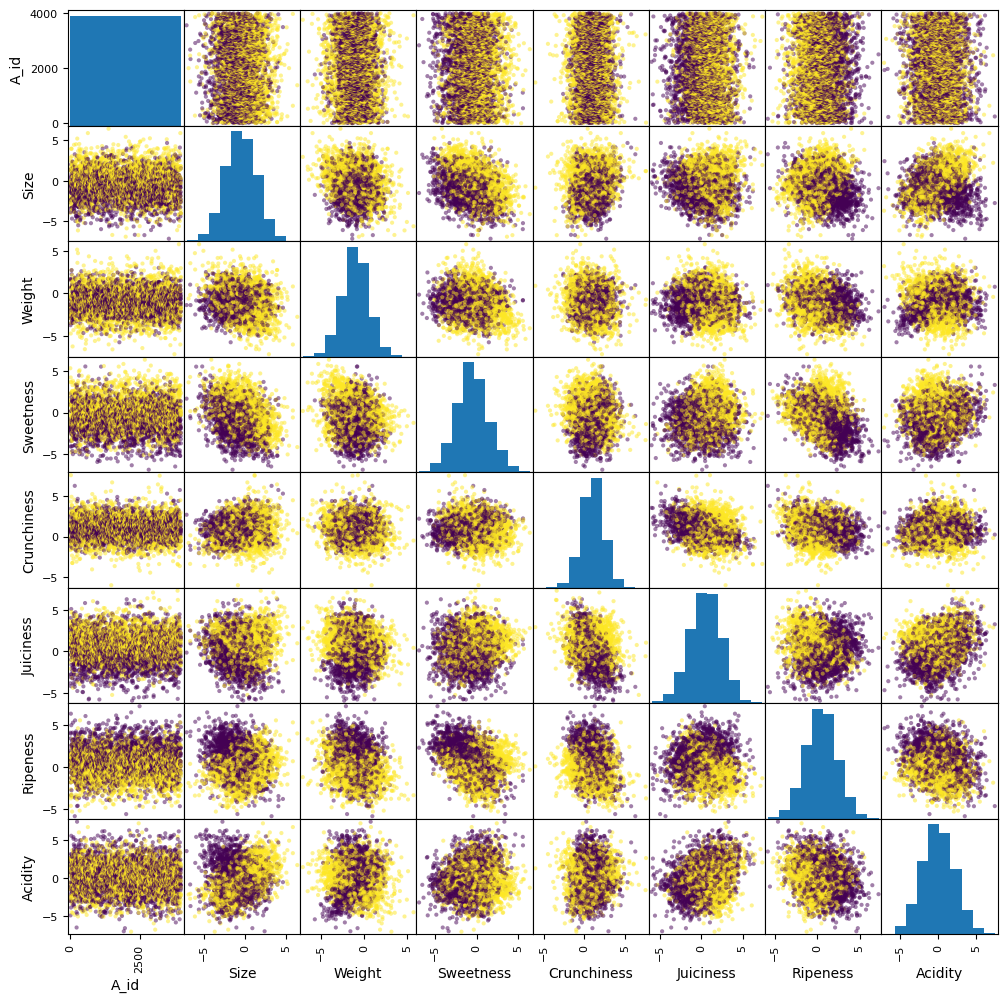

In [7]:
# Признаки нормально распределены, видна корреляция класса с некоторыми признаками
pd.plotting.scatter_matrix(apples, c=apples['Quality'].cat.codes, figsize=(12,12))
plt.show()

## Задача 1. Сравнение качества работы kNN при разных параметрах k

### Задача 1.1 (2 балла)
Напишите функцию, которая будет:

Отбирать все числовые признаки в датасете.
Перебирать все сочетания по два признака (без повторений) и запускать для каждой пары признаков алгоритм kNN (с k = 10). Для каждой итерации необходимо считать accuracy. Зависимая переменная  указывается отдельно при подаче в функцию.
Возвращает названия двух признаков, которые дали наибольший accuracy score. Если accuracy score совпадают для двух или нескольких пар, верните первую найденную вами пару.

In [8]:
X = apples.drop(columns='Quality')
y = apples['Quality'].cat.codes

In [12]:
def knn_two_features(X, y):
    results = {}
    for i in itertools.combinations(X.columns, 2):

        X_train, X_test, y_train, y_test = train_test_split(X[list(i)], y, test_size = 0.3, random_state=42)

        model = KNeighborsClassifier(n_neighbors=10)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        results[accuracy] = i

    return results[max(results.keys())]

knn_two_features(X, y)


('Juiciness', 'Ripeness')

### Задача 1.2 (2 балла)
Мы получили два признака, которые вместе дают наибольший accuracy score. Теперь покрутите их, одновременно изменяя параметр k. С помощью plot_decision_regions библиотеки mlxtend.plotting постройте поле 3х3 из визуализаций результатов работы алгоритма kNN с разными параметрами k. Параметры k можно взять следующие: 1, 2, 5, 10, 15, 20, 30, 40, 50.

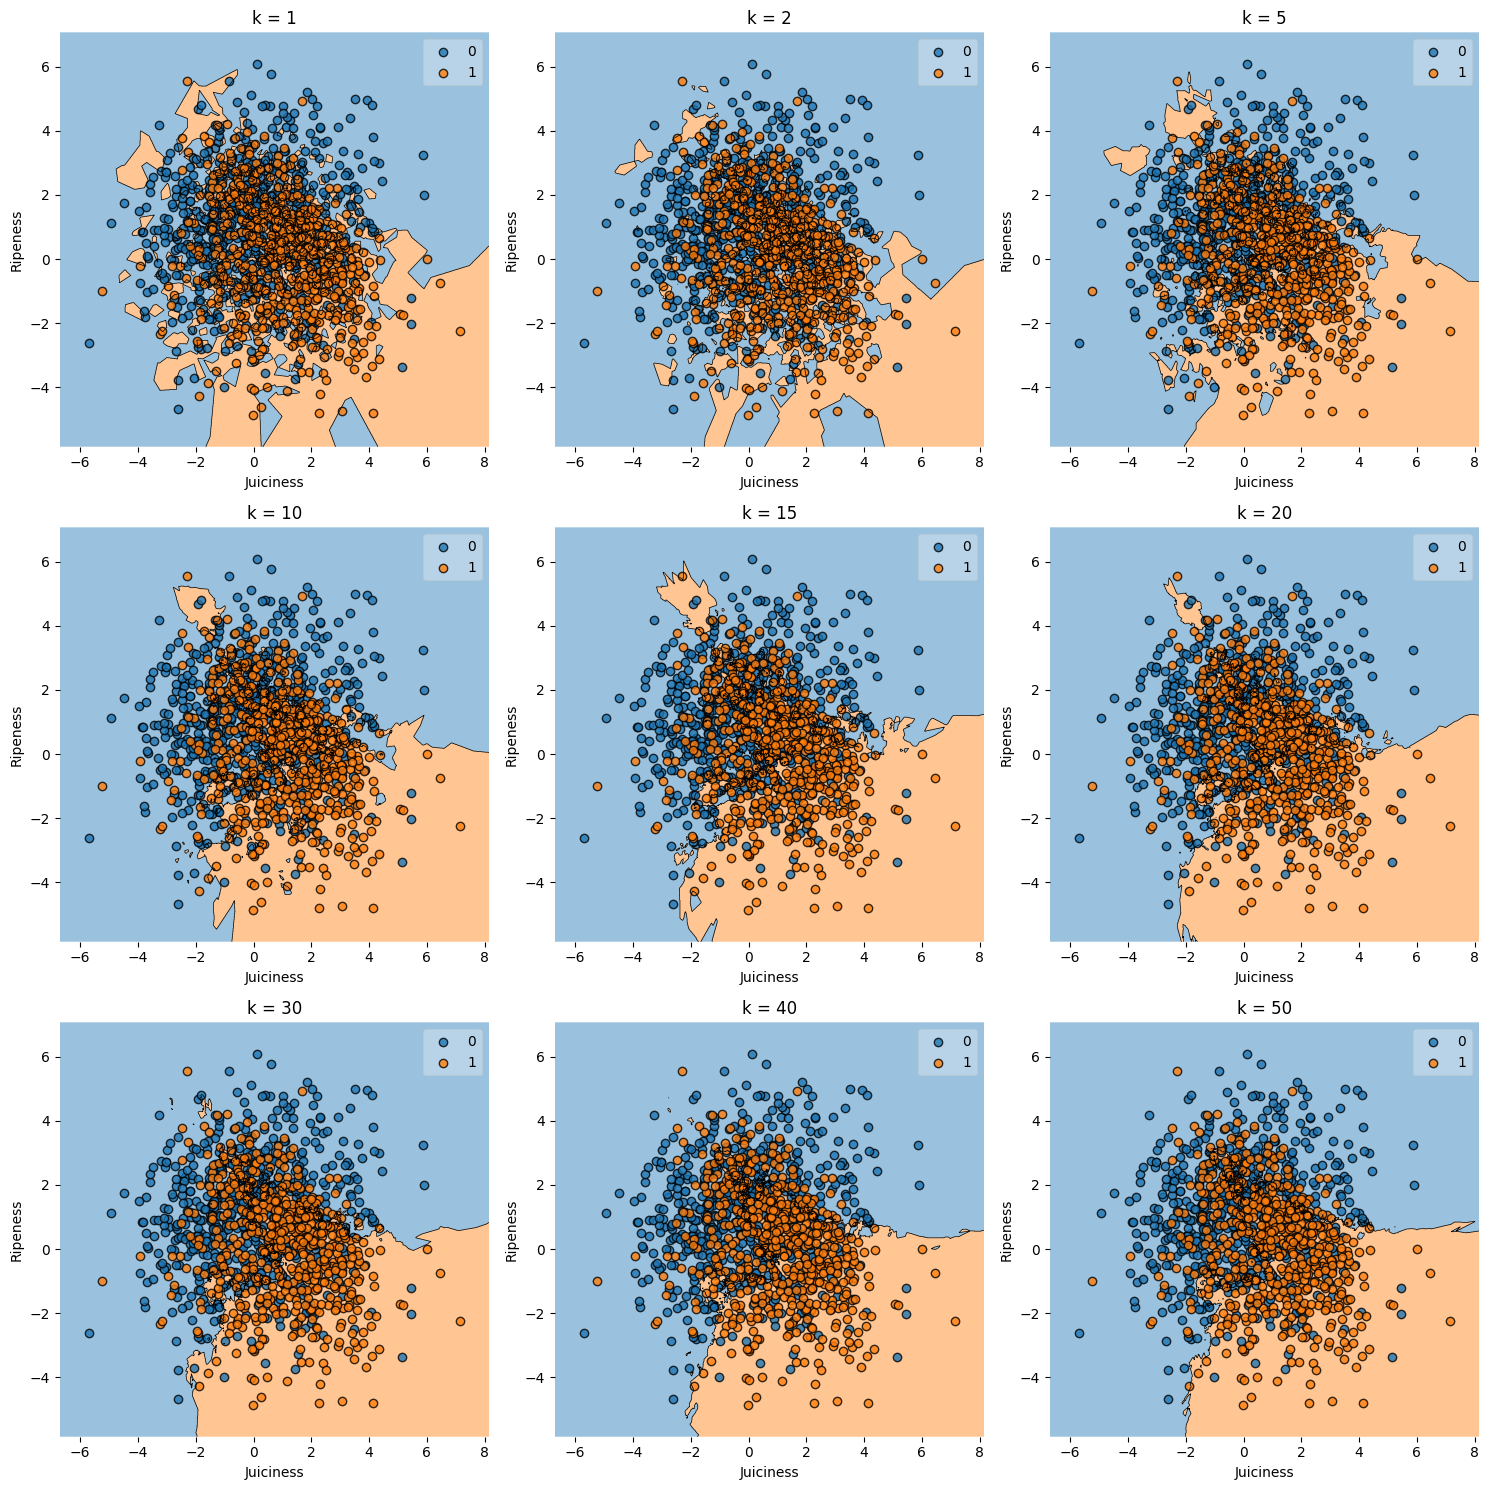

In [13]:
first_feature, second_feature = knn_two_features(X, y)
X_train, X_test, y_train, y_test = train_test_split(np.array(X[[first_feature, second_feature]]), np.array(y), test_size = 0.3, random_state=42)

k_values = [1, 2, 5, 10, 15, 20, 30, 40, 50]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    k = k_values[i]
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    plot_decision_regions(X_test, y_test, clf=model, ax=ax, markers='o')

    ax.set_title(f'k = {k}')
    ax.set_xlabel(first_feature)
    ax.set_ylabel(second_feature)

plt.tight_layout()
plt.show()

### Задача 1.3 (1 балл)
Функция plot_decision_regions удобна тем, что ее можно использовать для визуализации разных алгоритмов классификации.

Выберите два параметра, которые кажутся вам наиболее важными при оценке качества яблок. Используйте их, чтобы построить алгоритм решающего дерева.
Также постройте решающее дерево для признаков, которые были отобраны в пункте 1.1.
Создайте поле 1х2 и визуализируйте полученные результаты. Каждый график озаглавьте.

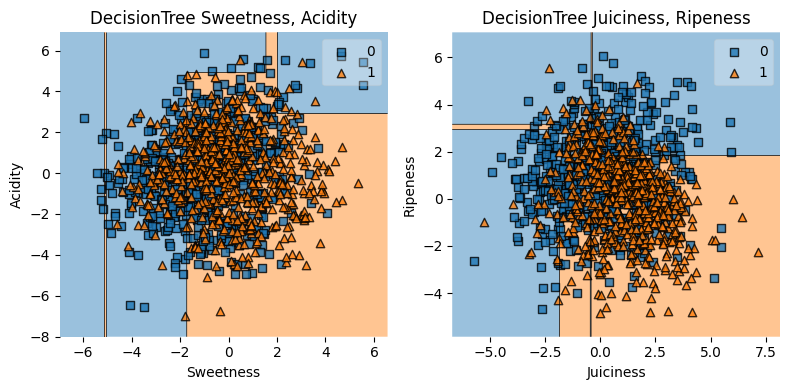

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

X_train, X_test, y_train, y_test = train_test_split(np.array(X[['Sweetness', 'Acidity']]), np.array(y), test_size = 0.3, random_state=42)
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf=tree, ax=axes[0])
axes[0].set_title('DecisionTree Sweetness, Acidity')
axes[0].set_xlabel('Sweetness')
axes[0].set_ylabel('Acidity')

X_train, X_test, y_train, y_test = train_test_split(np.array(X[[first_feature, second_feature]]), np.array(y), test_size = 0.3, random_state=42)
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf=tree, ax=axes[1])
axes[1].set_title(f'DecisionTree {first_feature}, {second_feature}')
axes[1].set_xlabel(first_feature)
axes[1].set_ylabel(second_feature)


plt.tight_layout()
plt.show()

## Задача 2. Визуализация алгоритмов решающего дерева

### Задача 2.1 (1 балл)
Аналогично пункту 1.1, создайте две функции для алгоритмов решающего дерева:

Функцию, которая возвращает два параметра, дающие наибольший accuracy score при применении алгоритма решающего дерева.
Такую же функцию, но которая возвращает три параметра (то есть перебирает все значения не по парам признаков, а по тройкам).

In [9]:
def tree_two_features(X, y):
    results = {}
    for i in itertools.combinations(X.columns, 2):

        X_train, X_test, y_train, y_test = train_test_split(X[list(i)], y, test_size = 0.3, random_state=42)

        model = DecisionTreeClassifier(max_depth=4)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        results[accuracy] = i

    return results[max(results.keys())]

tree_two_features(X, y)


('Size', 'Sweetness')

In [10]:
def tree_three_features(X, y):
    results = {}
    for i in itertools.combinations(X.columns, 3):

        X_train, X_test, y_train, y_test = train_test_split(X[list(i)], y, test_size = 0.3, random_state=42)

        model = DecisionTreeClassifier(max_depth=4)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        results[accuracy] = i

    return results[max(results.keys())]

tree_three_features(X, y)


('Size', 'Juiciness', 'Acidity')

### Задача 2.2 (1 балл)
Создайте три различных двумерных графика для визуализации результатов работы алгоритма случайного леса (из пункта 1 задачи 2.1). Можете использовать любые библиотеки (включая модули graphviz, dtreeviz).

In [44]:
first_feature, second_feature = tree_two_features(X, y)
X_train, X_test, y_train, y_test = train_test_split(X[[first_feature, second_feature]], y, test_size = 0.3, random_state=42)
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

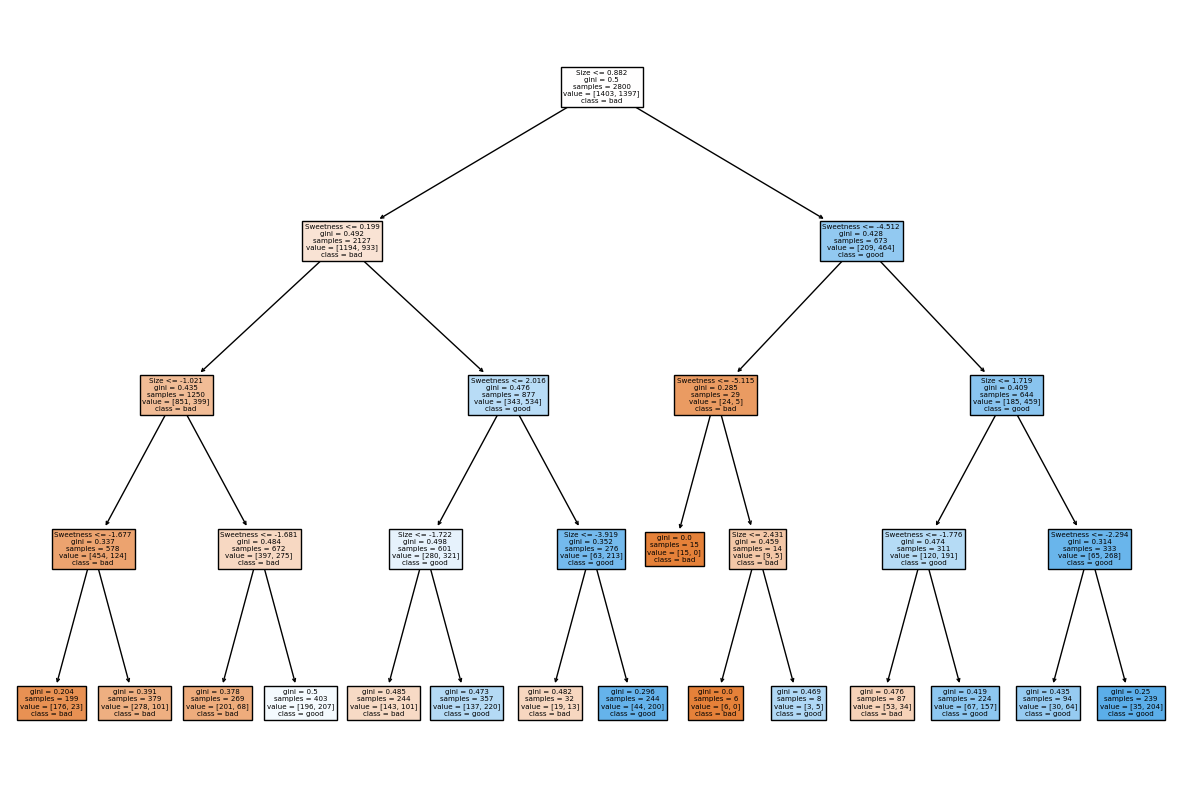

In [45]:
plt.figure(figsize=(15,10))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=['bad', 'good'],
                   filled=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


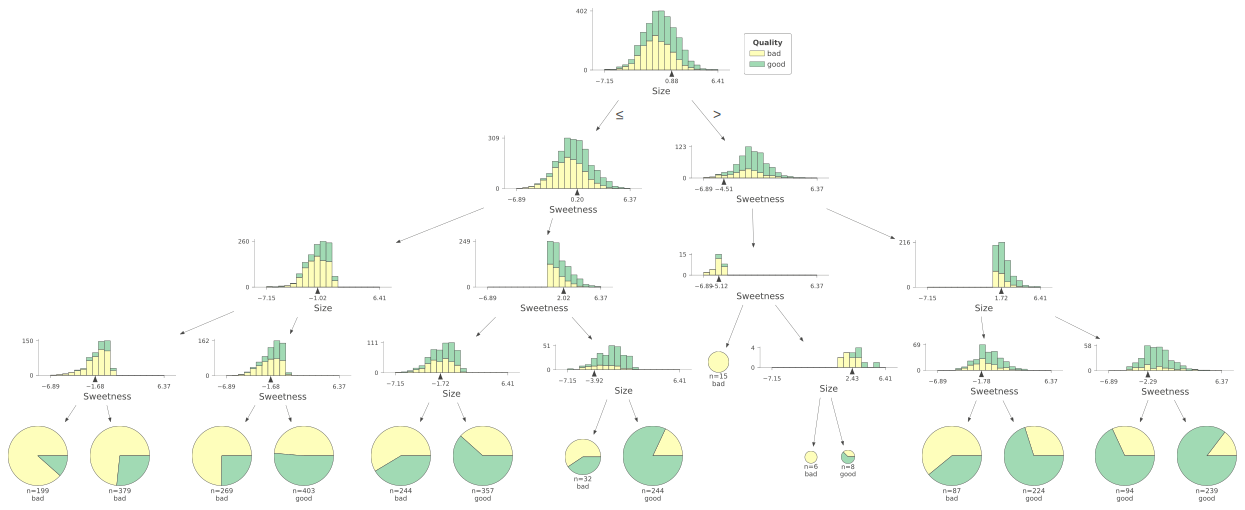

In [46]:
dtreeviz.model(model, X_train, y_train,
                           feature_names=X_train.columns,
                           target_name='Quality',
                           class_names=['bad', 'good']
                           ).view()

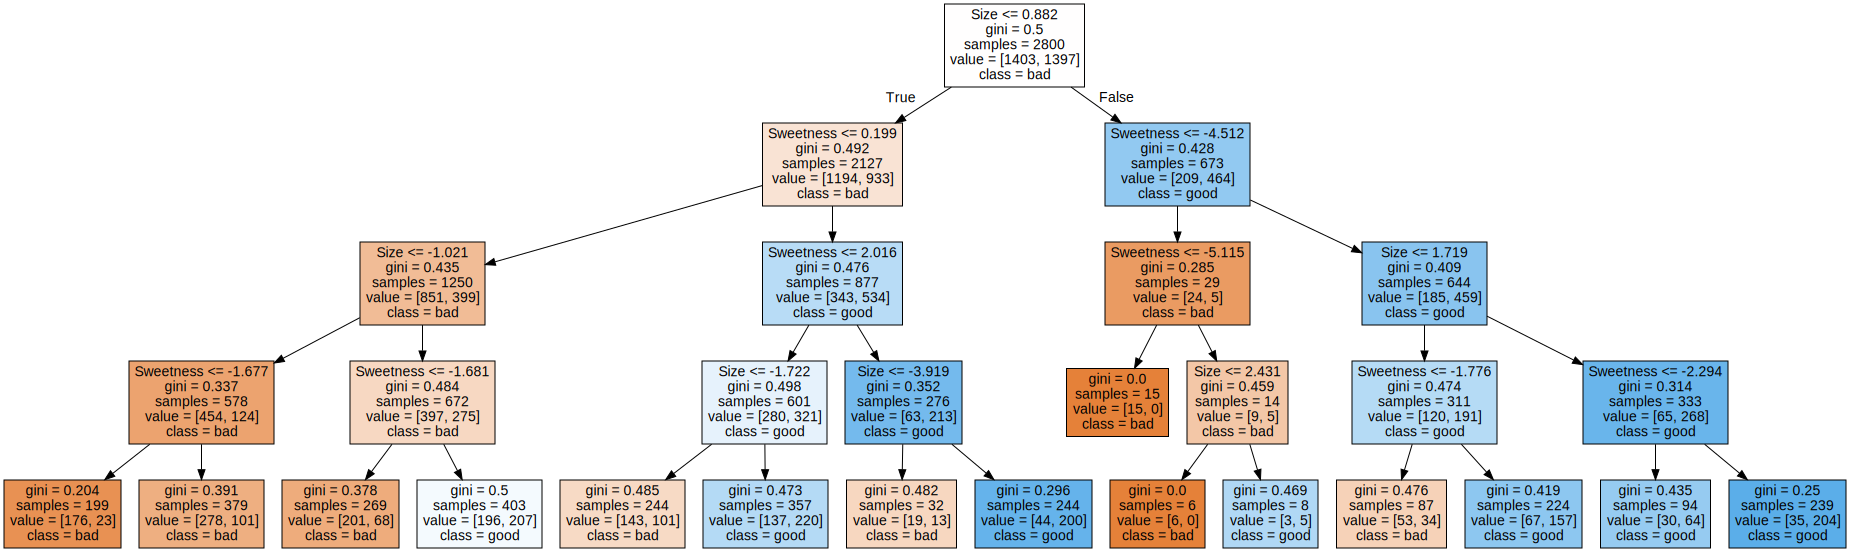

In [50]:
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=[first_feature, second_feature],
                                class_names=['bad', 'good'],
                                filled=True)

graphviz.Source(dot_data, format="png")

### Задача 2.3 (1 балл)
Аналогично предыдущему пункту, создайте три трехмерных графика (или псевдотрехмерных — двумерных, где цветом отображено третье измерение) для того алгоритма случайного леса с тремя параметрами, который вы получили во втором пункте задачи 2.1.

In [11]:
first_feature, second_feature, third_feature = tree_three_features(X, y)
X_train, X_test, y_train, y_test = train_test_split(X[[first_feature, second_feature, third_feature]], y, test_size = 0.3, random_state=42)
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

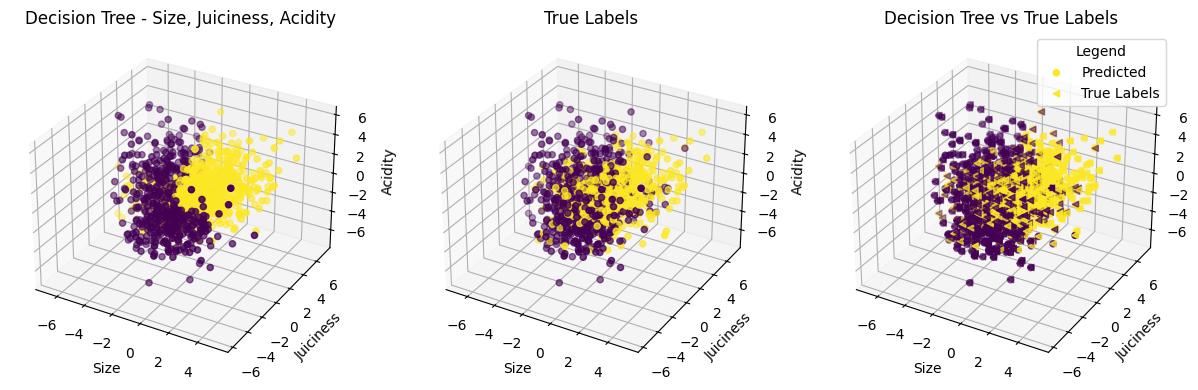

In [36]:
# Создание 3D-графиков для визуализации работы алгоритма
fig = plt.figure(figsize=(15, 5))

# График 1
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], c=model.predict(X_test), cmap='viridis')
ax1.set_title(f'Decision Tree - {first_feature}, {second_feature}, {third_feature}')
ax1.set_xlabel(first_feature)
ax1.set_ylabel(second_feature)
ax1.set_zlabel(third_feature)

# График 2
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], c=y_test, cmap='viridis')
ax2.set_title('True Labels')
ax2.set_xlabel(first_feature)
ax2.set_ylabel(second_feature)
ax2.set_zlabel(third_feature)

# График 3
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], c=model.predict(X_test), cmap='viridis', label='Predicted')
scatter4 = ax3.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], c=y_test, cmap='viridis', marker='<', label='True Labels')
ax3.set_title('Decision Tree vs True Labels')
ax3.set_xlabel(first_feature)
ax3.set_ylabel(second_feature)
ax3.set_zlabel(third_feature)

# Добавление легенды
legend = ax3.legend(handles=[scatter3, scatter4], loc='upper right')
legend.set_title('Legend')
legend.get_texts()[0].set_text('Predicted')
legend.get_texts()[1].set_text('True Labels')

plt.show()

## Задача 3. Градиентный спуск для функции одной переменной (2 балла)
Напишите с нуля свой алгоритм градиентного спуска. Создайте визуализацию работы градиентного спуска на каждой итерации для следующей функции:

Визуализацию снабдите названием, подписями к осям, а также добавьте текст с номером итерации (цвет выбирайте в зависимости от читаемости). Положение точки градиентного спуска на итерации n можно изобразить в качестве Scatter plot или Line plot.

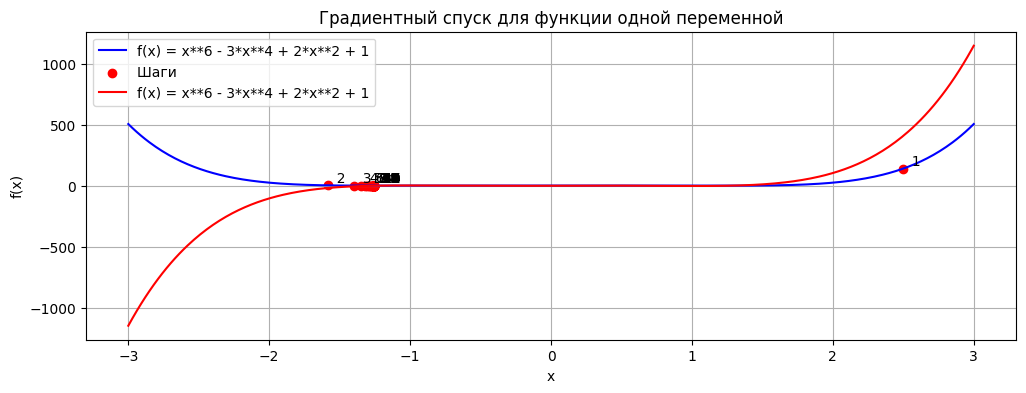

In [16]:
# Функция
def f(x):
    return x**6 - 3*x**4 + 2*x**2 + 1

# Производная функции
def df(x):
    return 6*x**5 - 12*x**3 + 4*x

# Алгоритм градиентного спуска
def gradient_descent(starting_point, learning_rate, num_iterations):
    x_values = [starting_point]
    
    for _ in range(num_iterations):
        current_x = x_values[-1]
        gradient = df(current_x)
        new_x = current_x - learning_rate * gradient
        x_values.append(new_x)
    
    return x_values

# Параметры градиентного спуска
starting_point = 2.5
learning_rate = 0.01
num_iterations = 50

# Запуск градиентного спуска
x_values = gradient_descent(starting_point, learning_rate, num_iterations)

# Визуализация
x_range = np.linspace(-3, 3, 400)
plt.figure(figsize=(12, 4))
plt.plot(x_range, f(x_range), label='f(x) = x**6 - 3*x**4 + 2*x**2 + 1', color='blue')
plt.scatter(x_values, [f(x) for x in x_values], color='red', label='Шаги ')
plt.plot(x_range, df(x_range), label='f(x) = x**6 - 3*x**4 + 2*x**2 + 1', color='red')

# Добавление текста с номером итерации
for i, (x, y) in enumerate(zip(x_values, [f(x) for x in x_values])):
    plt.text(x, y, f'  {i+1}', color='black', fontsize=10, verticalalignment='bottom')

# Добавление подписей и названия
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Градиентный спуск для функции одной переменной')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
x_values

[2.5,
 -1.5843749999999996,
 -1.399240398056978,
 -1.3501951743544718,
 -1.3223238954448888,
 -1.30431546857895,
 -1.2919190524889097,
 -1.2830589907659438,
 -1.276569795152138,
 -1.2717366130563452,
 -1.2680936021563955,
 -1.2653236814733284,
 -1.2632039672605777,
 -1.2615739484860993,
 -1.2603158808804265,
 -1.2593421613178717,
 -1.2585868967945348,
 -1.2580001036184696,
 -1.2575436168055751,
 -1.2571881465904011,
 -1.2569111251171297,
 -1.2566951099253916,
 -1.256526587372759,
 -1.2563950679759228,
 -1.256292397684499,
 -1.2562122306388739,
 -1.256149623775237,
 -1.2561007240357285,
 -1.2560625263686485,
 -1.2560326860939817,
 -1.2560093731745585,
 -1.2559911588832693,
 -1.2559769275726462,
 -1.2559658079306946,
 -1.255957119385029,
 -1.2559503302963382,
 -1.2559450253351285,
 -1.2559408800167298,
 -1.2559376408191156,
 -1.2559351096566802,
 -1.255933131753853,
 -1.25593158617299,
 -1.2559303784149023,
 -1.2559294346380874,
 -1.255928697142316,
 -1.255928120839883,
 -1.2559276704984

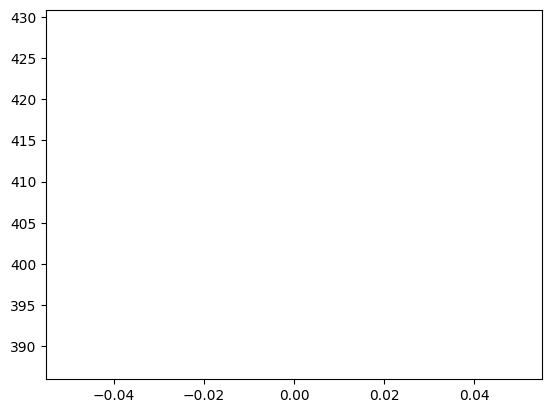

In [15]:

plt.plot(df(x_values[0]), label='f(x) = x**6 - 3*x**4 + 2*x**2 + 1', color='red')

### Задача 4. Визуализация градиентного спуска для трехмерной функции (4 балла)
В теории оптимизации есть достаточно известная функция Розенброка. Она используется для проверки производительности алгоритмов.

Постройте трехмерную визуализацию (plt.surface() или ее двумерные аналоги, например, plt.contourf()), работы градиентного спуска для функции Розенброка:

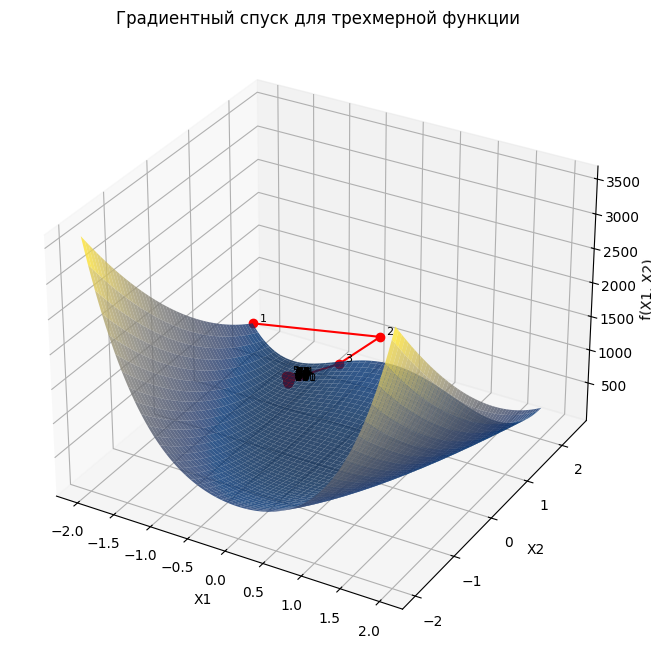

In [63]:
# Функция Розенброка
def rosenbrock(x1, x2):
    return (1 - x1)**2 + 100 * (x2 - x1**2)**2

# Градиент функции Розенброка
def rosenbrock_gradient(x1, x2):
    df_dx1 = -2 * (1 - x1) - 400 * x1 * (x2 - x1**2)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Алгоритм градиентного спуска
def gradient_descent_rosenbrock(starting_point, learning_rate, num_iterations):
    x_values = [starting_point]
    
    for _ in range(num_iterations):
        current_x = x_values[-1]
        gradient = rosenbrock_gradient(*current_x)
        new_x = current_x - learning_rate * gradient
        x_values.append(new_x)
    
    return np.array(x_values)

# Параметры градиентного спуска
starting_point = np.array([-2, 2])
learning_rate = 0.001
num_iterations = 100

# Запуск градиентного спуска
trajectory = gradient_descent_rosenbrock(starting_point, learning_rate, num_iterations)

# Визуализация
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Создание сетки точек для отображения поверхности
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
z = rosenbrock(x1, x2)

# Построение поверхности функции Розенброка
ax.plot_surface(x1, x2, z, cmap='cividis', alpha=0.8)

# Отображение траектории градиентного спуска
ax.plot(trajectory[:, 0], trajectory[:, 1], rosenbrock(trajectory[:, 0], trajectory[:, 1]), color='red', marker='o')

# Добавление текста с номером итерации
for i, (x, y, z_val) in enumerate(zip(trajectory[:, 0], trajectory[:, 1], rosenbrock(trajectory[:, 0], trajectory[:, 1]))):
    ax.text(x, y, z_val, f'  {i+1}', color='black', fontsize=8, verticalalignment='bottom')

# Добавление подписей и названия
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.set_title('Градиентный спуск для трехмерной функции')

plt.show()
